<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Misc/blob/master/Remove_noise_with_keras_RBFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-11651-Fri-Mar-13-2020.wget.sh


--2020-03-13 11:07:06--  http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-11651-Fri-Mar-13-2020.wget.sh
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2233 (2.2K) [application/x-sh]
Saving to: ‘amiBuild-11651-Fri-Mar-13-2020.wget.sh’

amiBuild-11651-Fri- 100%[===================>]   2.18K  --.-KB/s    in 0s      

2020-03-13 11:07:06 (369 MB/s) - ‘amiBuild-11651-Fri-Mar-13-2020.wget.sh’ saved [2233/2233]



In [0]:
!ls

amiBuild-11651-Fri-Mar-13-2020.wget.sh	sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!sh amiBuild-11651-Fri-Mar-13-2020.wget.sh

--2020-03-13 11:07:36--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-01.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’

ES2008a.Array1-01.w 100%[===================>]  31.84M  3.40MB/s    in 9.2s    

2020-03-13 11:07:45 (3.48 MB/s) - ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’ saved [33387564/33387564]

--2020-03-13 11:07:45--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-02.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES20

In [0]:
!ls

amiBuild-11651-Fri-Mar-13-2020.manifest.txt  amicorpus	  sample_data
amiBuild-11651-Fri-Mar-13-2020.wget.sh	     CCBY4.0.txt


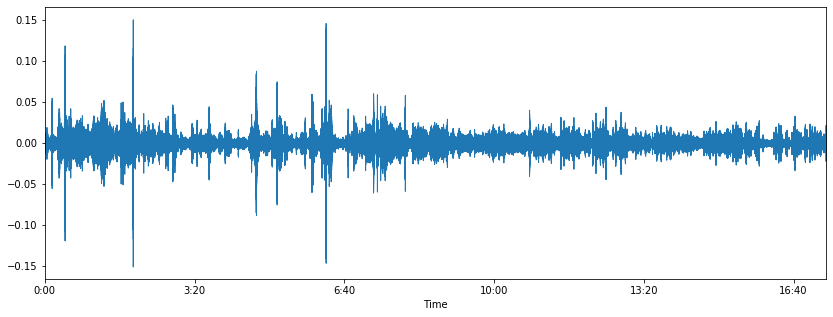

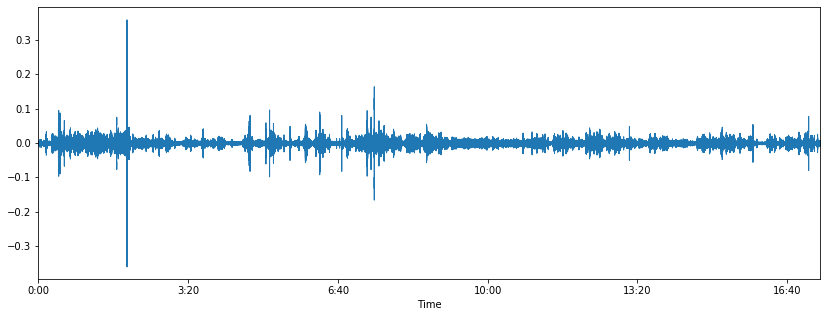

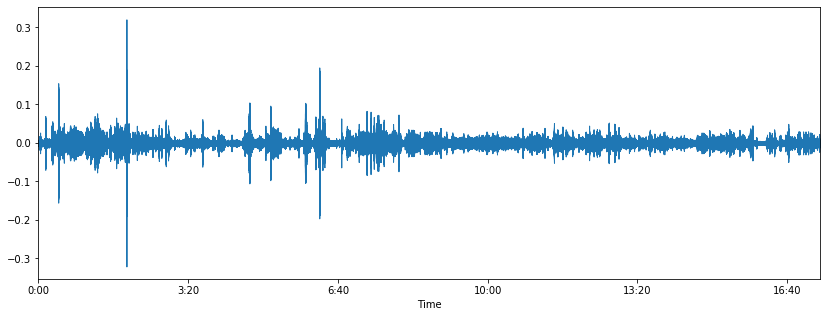

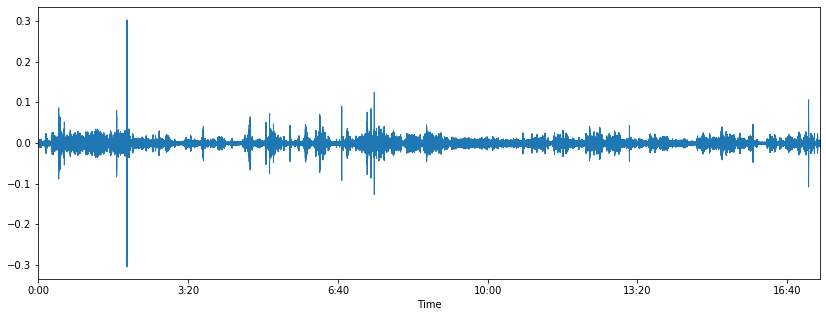

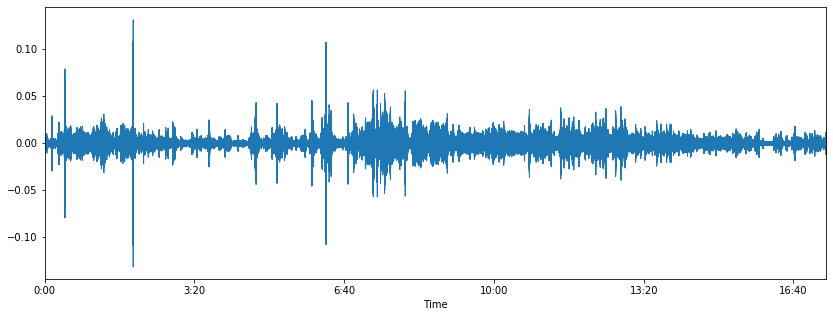

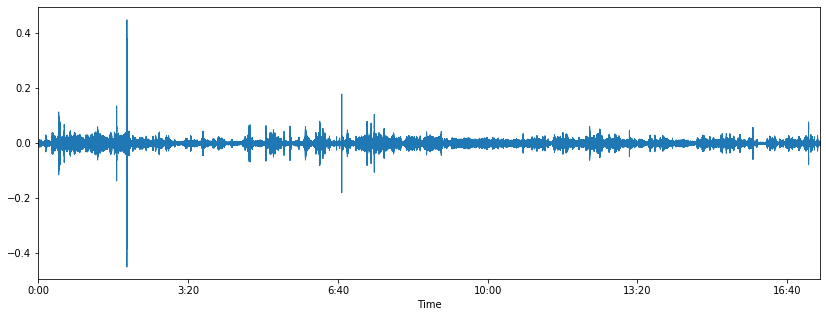

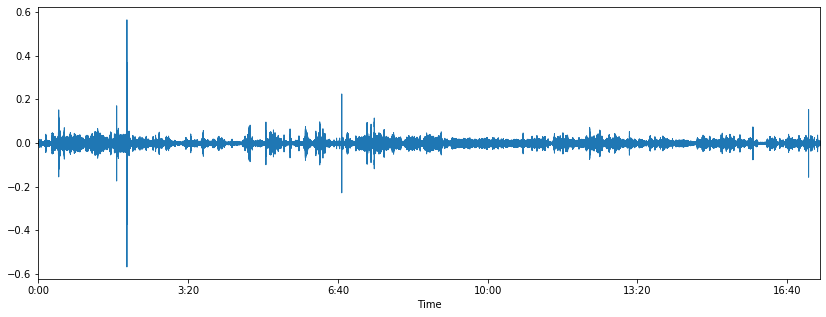

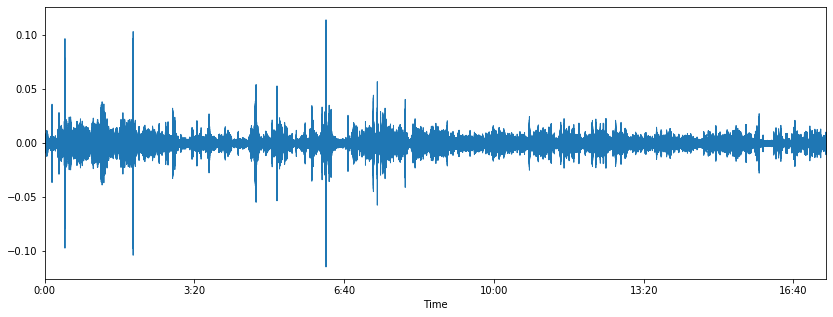

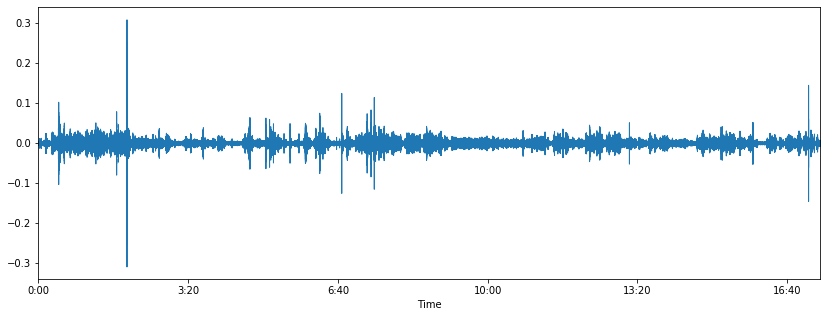

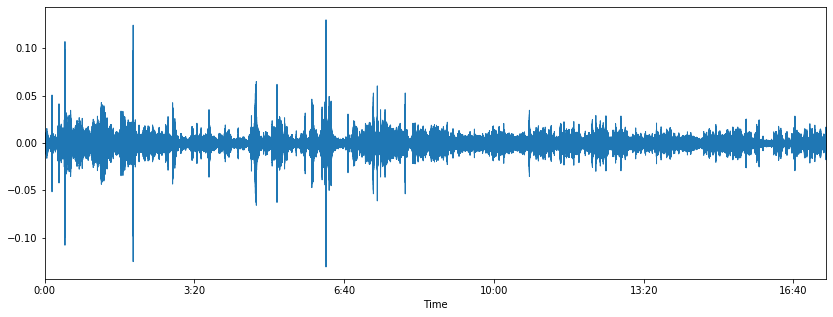

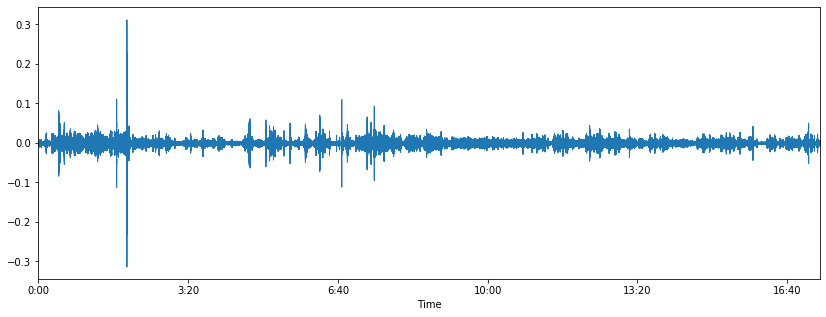

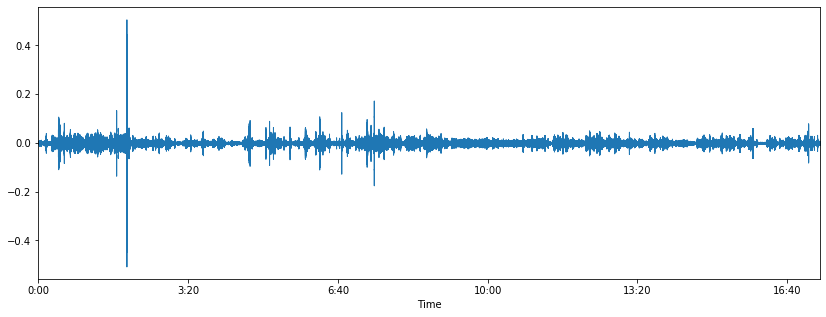

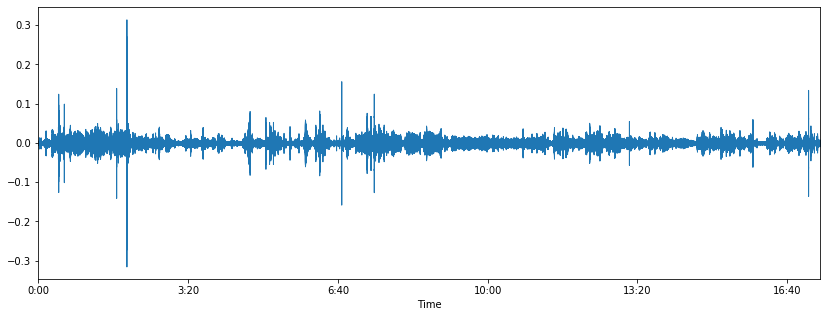

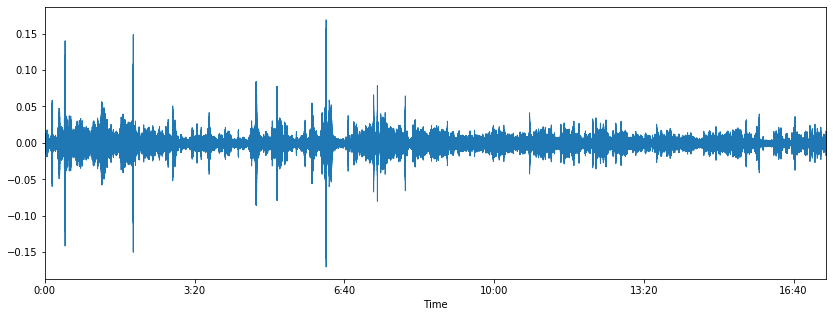

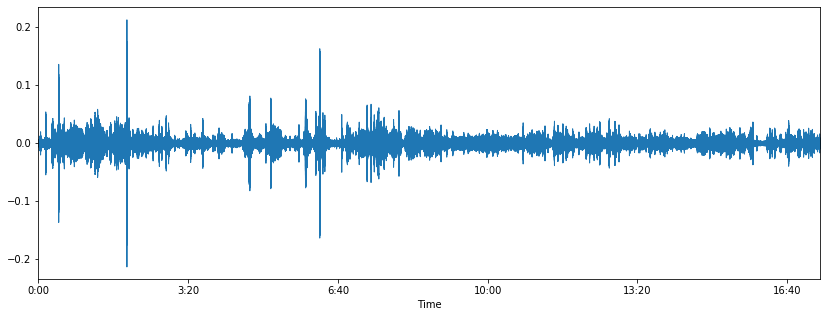

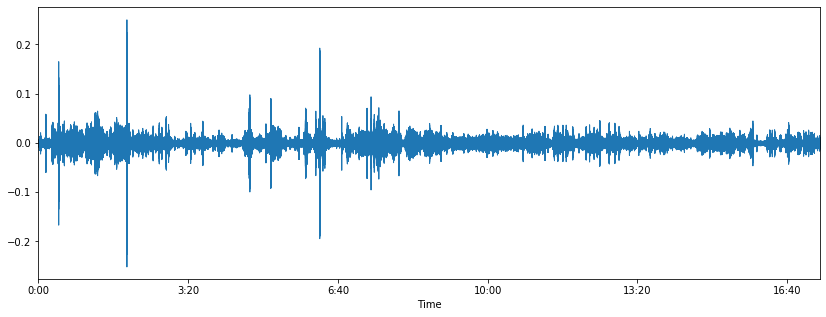

In [0]:
#path 
#/content/amicorpus/ES2008a/audio/ES2008a.Array1-01.wav
#check /content/drive/My Drive/amicorpus/ES2008a/audio
import librosa
#x , sr = librosa.load('/content/amicorpus/ES2008a/audio/ES2008a.Array1-01.wav')
#import matplotlib.pyplot as plt
#import librosa.display
#plt.figure(figsize=(14, 5))
#librosa.display.waveplot(x,sr=sr)
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# loop over all files in the current directory ending with .txt
for fname in glob("/content/amicorpus/ES2008a/audio/*.wav"):
  x , sr = librosa.load(fname)
  import librosa.display
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x,sr=sr)


In [0]:
!ls

amiBuild-11651-Fri-Mar-13-2020.manifest.txt  amicorpus	  sample_data
amiBuild-11651-Fri-Mar-13-2020.wget.sh	     CCBY4.0.txt


In [0]:
keras.__version__

'2.2.5'

In [0]:
from keras import backend as K
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant

In [0]:
class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        #assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [0]:
#import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
#from rbflayer import RBFLayer, InitCentersRandom
#import matplotlib.pyplot as plt


In [0]:
x.shape

(23006088,)

In [0]:
for fname in glob("/content/amicorpus/ES2008a/audio/*.wav"):
  print(fname)

/content/amicorpus/ES2008a/audio/ES2008a.Array2-02.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-07.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-08.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-06.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-01.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-02.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-03.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-05.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-05.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-03.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-01.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-08.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-04.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-04.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-07.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-06.wav


In [0]:
from glob import glob
import numpy as np
import librosa
X = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
for fname in glob("/content/drive/My Drive/amicorpus/ES2008a/audio/ES2008a.Array1-0*.wav"):
    #struct = fname.split('_')
    #digit = struct[0]
    wav, sr = librosa.load(fname)
    padded = pad(wav, 30000)
    X.append(padded)
    

In [0]:
#saving folder  to my gdrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#copy files from colab to my gdrive to work on later without downloading
#!cp  -r "/content/amicorpus" "/content/drive/My Drive/"

In [0]:
X=np.vstack(X)

In [0]:
X.shape

(8, 30000)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
 rbflayer = RBFLayer(X.shape,
                        initializer=InitCentersRandom(X),
                        betas=2.0,
                        input_shape=(X.shape))

In [0]:
model = Sequential()

In [0]:
model.add(rbflayer)
model.add(Dense())

In [0]:
#once it done try to decode  (like autoencoder to remove noise )
